# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [3]:
file1 = 'data1.pkl'

In [4]:
project = joblib.load(file1)

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [5]:
project.info() # Holiday_Name만 범주형

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2015-01-01 to 2022-12-31
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   car_cnt                  2923 non-null   int64   
 1   request_cnt              2923 non-null   int64   
 2   ride_cnt                 2923 non-null   int64   
 3   fare                     2923 non-null   int64   
 4   distance                 2923 non-null   int64   
 5   weekday                  2923 non-null   object  
 6   month                    2923 non-null   int64   
 7   week                     2923 non-null   UInt32  
 8   year                     2923 non-null   int64   
 9   target                   2923 non-null   float64 
 10  temp_max                 2923 non-null   float64 
 11  temp_min                 2923 non-null   float64 
 12  rain(mm)                 2923 non-null   float64 
 13  humidity_max(%)          2923 non-null   floa

In [6]:
project.describe()

,car_cnt,request_cnt,ride_cnt,fare,distance,month,week,year,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),7day_waiting_time_mean,30day_waiting_time_mean,ride_percentage
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.0,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,418.647622,3924.838180,3283.234348,2304.362299,9254.353062,6.524119,26.648991,2018.499145,40.292371,18.071502,9.409408,3.354465,79.089634,41.117961,13.494266,40.284083,40.215376,84.156482
std,133.764485,1510.056733,1249.463168,107.351769,1020.066902,3.449303,15.066313,2.291306,14.115281,10.711410,10.787067,12.593801,14.031115,16.396795,6.939983,12.042999,11.403575,5.216705
min,132.000000,527.000000,462.000000,2131.000000,7672.000000,1.000000,1.0,2015.000000,0.000000,-11.200000,-18.500000,0.000000,29.000000,7.000000,0.000000,17.200000,17.200000,59.699625
25%,278.000000,2161.000000,1778.500000,2228.000000,8521.000000,4.000000,14.0,2016.500000,29.600000,9.000000,0.500000,0.000000,70.000000,29.000000,8.235000,31.271429,32.063333,80.596425
50%,454.000000,4720.000000,3932.000000,2257.000000,8822.000000,7.000000,27.0,2018.000000,38.200000,19.700000,10.000000,0.000000,82.000000,39.000000,12.660000,39.028571,39.020000,84.557110
75%,522.000000,5110.000000,4241.000000,2401.000000,10154.000000,10.000000,40.0,2020.000000,48.600000,27.400000,18.900000,0.300000,90.000000,51.000000,18.580000,46.957143,48.211667,87.771823
max,1413.000000,6182.000000,5189.000000,2733.000000,14136.000000,12.000000,53.0,2022.000000,96.100000,39.400000,30.400000,178.900000,100.000000,98.000000,30.790000,83.928571,78.716667,96.884422


In [7]:
project.head()

,car_cnt,request_cnt,ride_cnt,fare,distance,weekday,month,week,year,target,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,Holiday_Name,7day_waiting_time_mean,30day_waiting_time_mean,ride_percentage
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,2427,10764,Thr,1,1,2015,17.2,...,-9.8,0.0,52.0,33.0,9.79,겨울,New year,17.200000,17.200000,90.322581
2015-01-02,420,3158,2839,2216,8611,Fri,1,1,2015,26.2,...,-8.9,0.0,63.0,28.0,9.07,겨울,0,21.700000,21.700000,89.898670
2015-01-03,209,1648,1514,2377,10198,Sat,1,1,2015,24.5,...,-9.2,0.0,73.0,37.0,8.66,겨울,0,22.633333,22.633333,91.868932
2015-01-04,196,1646,1526,2431,10955,Sun,1,1,2015,26.2,...,0.2,0.0,89.0,58.0,5.32,겨울,0,23.525000,23.525000,92.709599
2015-01-05,421,4250,3730,2214,8663,Mon,1,2,2015,23.6,...,-0.9,0.0,95.0,52.0,6.48,겨울,0,23.540000,23.540000,87.764706


In [8]:
# 숫자형 변수 분석


In [9]:
# 범주형 변수 분석


### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\s

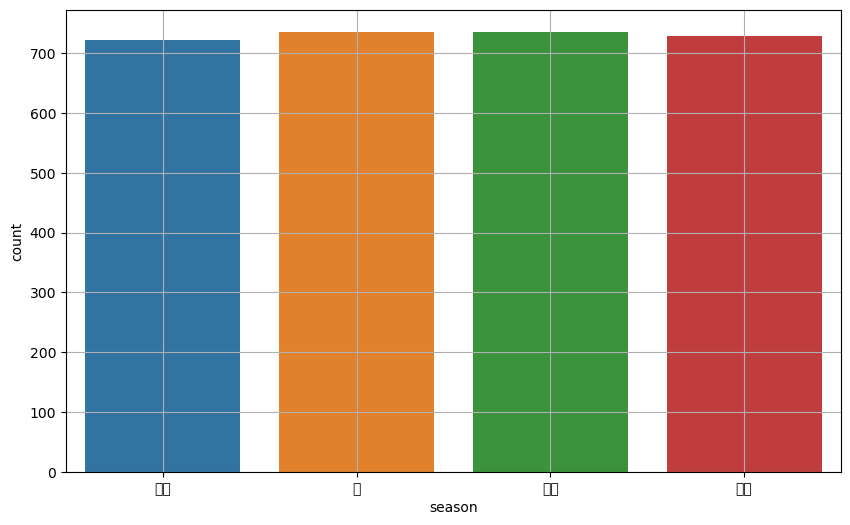

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'season' 열을 문자열로 변환 (category 값들을 레이블로 표시하기 위해)
project['season'] = project['season'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=project)
plt.grid()
plt.show()

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [11]:
project_copy = project.copy()

In [12]:
project_copy.drop(columns=['Holiday_Name'], inplace=True) # 범주형인 Holiday_Name 삭제
project_copy.reset_index(inplace = True)
project_copy.head()

,Date,car_cnt,request_cnt,ride_cnt,fare,distance,weekday,month,week,year,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,7day_waiting_time_mean,30day_waiting_time_mean,ride_percentage
0,2015-01-01,213,1023,924,2427,10764,Thr,1,1,2015,...,-4.3,-9.8,0.0,52.0,33.0,9.79,겨울,17.200000,17.200000,90.322581
1,2015-01-02,420,3158,2839,2216,8611,Fri,1,1,2015,...,-2.0,-8.9,0.0,63.0,28.0,9.07,겨울,21.700000,21.700000,89.898670
2,2015-01-03,209,1648,1514,2377,10198,Sat,1,1,2015,...,2.4,-9.2,0.0,73.0,37.0,8.66,겨울,22.633333,22.633333,91.868932
3,2015-01-04,196,1646,1526,2431,10955,Sun,1,1,2015,...,8.2,0.2,0.0,89.0,58.0,5.32,겨울,23.525000,23.525000,92.709599
4,2015-01-05,421,4250,3730,2214,8663,Mon,1,2,2015,...,7.9,-0.9,0.0,95.0,52.0,6.48,겨울,23.540000,23.540000,87.764706


C:\Users\user\AppData\Local\Temp\ipykernel_24900\370886200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(project.corr(), annot=True)


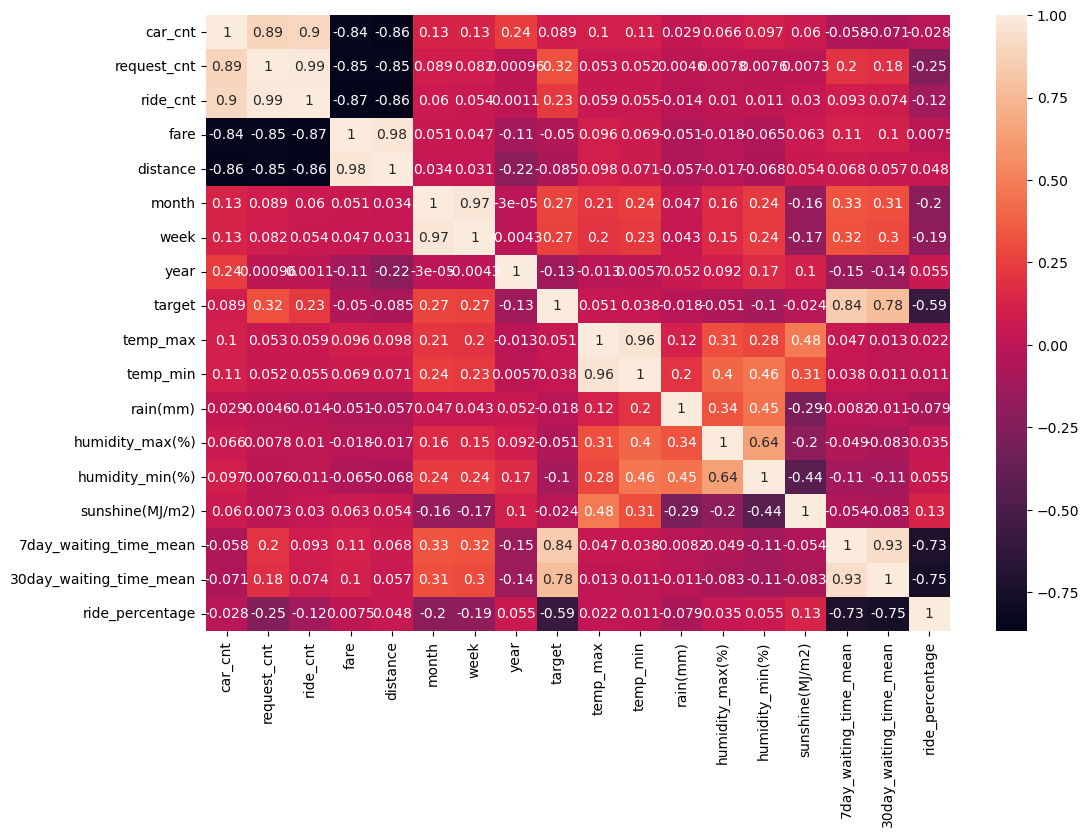

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(project.corr(), annot=True)
plt.show()

In [14]:
project_copy.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'fare', 'distance',
       'weekday', 'month', 'week', 'year', 'target', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'season', '7day_waiting_time_mean', '30day_waiting_time_mean',
       'ride_percentage'],
      dtype='object')

#### 2) 산점도

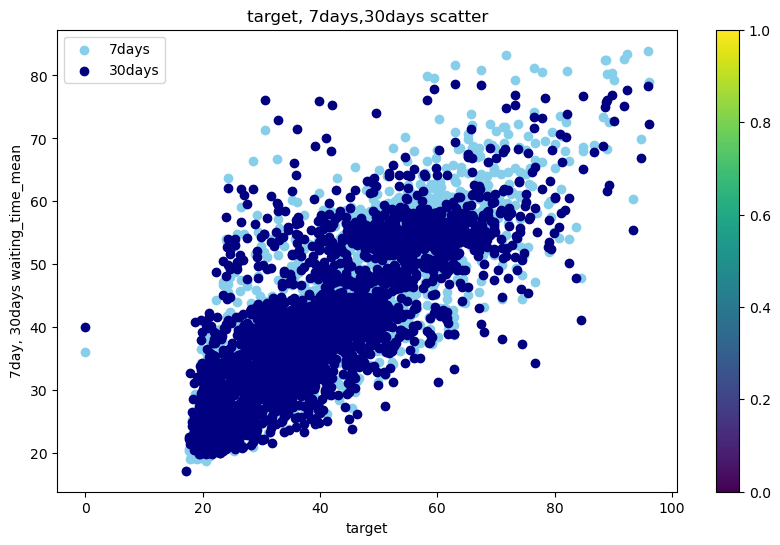

In [15]:
plt.figure(figsize = (10,6))
plt.scatter(x=project_copy['target'],y=project_copy['7day_waiting_time_mean'], c = 'skyblue', label = '7days')
plt.scatter(x=project_copy['target'],y=project_copy['30day_waiting_time_mean'], c = 'navy', label = '30days')
plt.xlabel('target')
plt.ylabel('7day, 30days waiting_time_mean')
plt.title('target, 7days,30days scatter')
plt.legend()
plt.colorbar()
plt.show()

# 7일 이동평균량과 30일 이동평균량은 비슷한 양상을 보이고 있다. 
# 이동시간이 쌓여서 그런것 같다..?

In [16]:
project_copy2 = project.copy()
project_copy2['Holiday_Name'] = project_copy2['Holiday_Name'].apply(lambda x: 1 if x != 0 else 0)
project_copy2.head(3)

,car_cnt,request_cnt,ride_cnt,fare,distance,weekday,month,week,year,target,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,Holiday_Name,7day_waiting_time_mean,30day_waiting_time_mean,ride_percentage
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,2427,10764,Thr,1,1,2015,17.2,...,-9.8,0.0,52.0,33.0,9.79,겨울,1,17.200000,17.200000,90.322581
2015-01-02,420,3158,2839,2216,8611,Fri,1,1,2015,26.2,...,-8.9,0.0,63.0,28.0,9.07,겨울,0,21.700000,21.700000,89.898670
2015-01-03,209,1648,1514,2377,10198,Sat,1,1,2015,24.5,...,-9.2,0.0,73.0,37.0,8.66,겨울,0,22.633333,22.633333,91.868932


In [17]:
project_copy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2015-01-01 to 2022-12-31
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car_cnt                  2923 non-null   int64  
 1   request_cnt              2923 non-null   int64  
 2   ride_cnt                 2923 non-null   int64  
 3   fare                     2923 non-null   int64  
 4   distance                 2923 non-null   int64  
 5   weekday                  2923 non-null   object 
 6   month                    2923 non-null   int64  
 7   week                     2923 non-null   UInt32 
 8   year                     2923 non-null   int64  
 9   target                   2923 non-null   float64
 10  temp_max                 2923 non-null   float64
 11  temp_min                 2923 non-null   float64
 12  rain(mm)                 2923 non-null   float64
 13  humidity_max(%)          2923 non-null   float64
 14  humidi

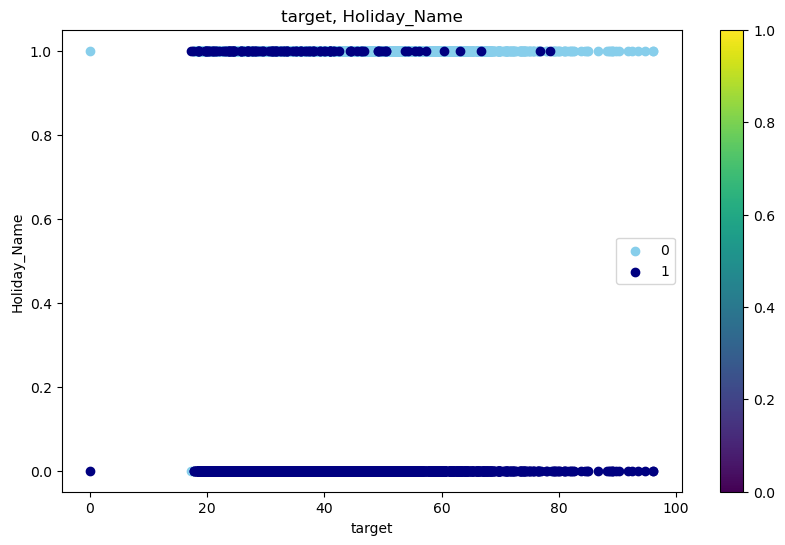

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x=project_copy2['target'], y=project_copy2['Holiday_Name'] == 0, c='skyblue', label='0')
plt.scatter(x=project_copy2['target'], y=project_copy2['Holiday_Name'] == 1, c='navy', label='1')

plt.xlabel('target')
plt.ylabel('Holiday_Name')
plt.title('target, Holiday_Name')
plt.legend()
plt.colorbar()
plt.show()

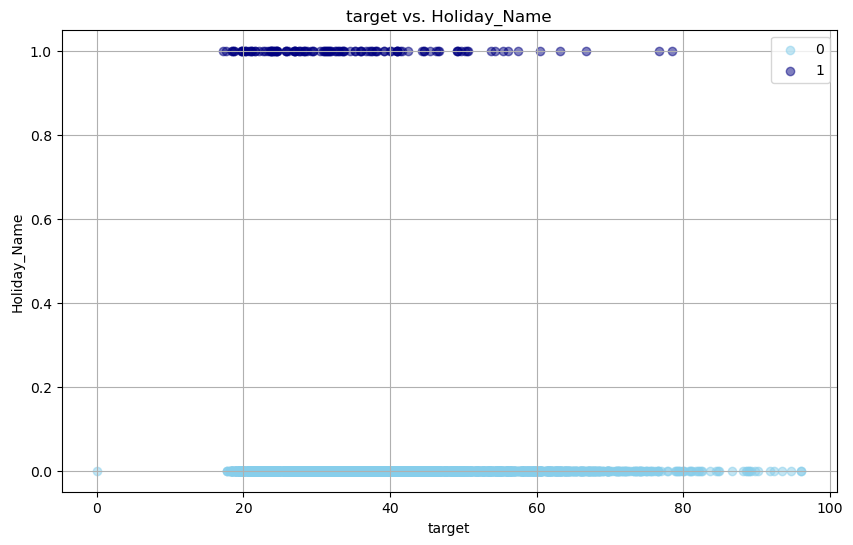

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter points with 'Holiday_Name' == 0 in skyblue
plt.scatter(x=project_copy2[project_copy2['Holiday_Name'] == 0]['target'], 
            y=project_copy2[project_copy2['Holiday_Name'] == 0]['Holiday_Name'], 
            c='skyblue', label='0', alpha=0.5)  # Use alpha to make points transparent

# Scatter points with 'Holiday_Name' == 1 in navy
plt.scatter(x=project_copy2[project_copy2['Holiday_Name'] == 1]['target'], 
            y=project_copy2[project_copy2['Holiday_Name'] == 1]['Holiday_Name'], 
            c='navy', label='1', alpha=0.5)  # Use alpha to make points transparent

plt.xlabel('target')
plt.ylabel('Holiday_Name')
plt.title('target vs. Holiday_Name')
plt.legend()
plt.grid()  # Add grid lines
plt.show()


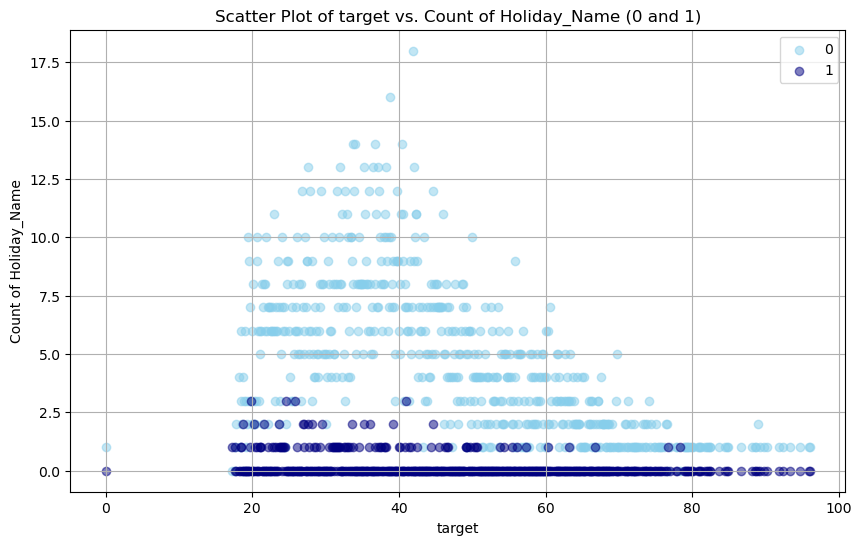

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

count_by_target = project_copy2.groupby('target')['Holiday_Name'].value_counts().unstack(fill_value=0)

plt.scatter(x=count_by_target.index, y=count_by_target[0], c='skyblue', label='0', alpha=0.5)
plt.scatter(x=count_by_target.index, y=count_by_target[1], c='navy', label='1', alpha=0.5)

plt.xlabel('target')
plt.ylabel('Count of Holiday_Name')
plt.title('Scatter Plot of target vs. Count of Holiday_Name (0 and 1)')
plt.legend()
plt.grid(True)
plt.show()

# 공휴일과 아닌 날들의 산점도는 비슷한 양상을 보이나, 많이들 이용하지 않는다.
# 혹시 택시의 수가 공휴일에는 줄어들어서 그런게 아닐까 궁금하다

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [20]:
project['Holiday_Name'].value_counts()

0                          2803
Korean New Year's Day        24
Midautumn Festival           24
New year                      8
Independence Day              8
Children's Day                8
Buddha's Birthday             8
Memorial Day                  8
Liberation Day                8
National Foundation Day       8
Hangul Day                    8
Christmas Day                 8
Name: Holiday_Name, dtype: int64

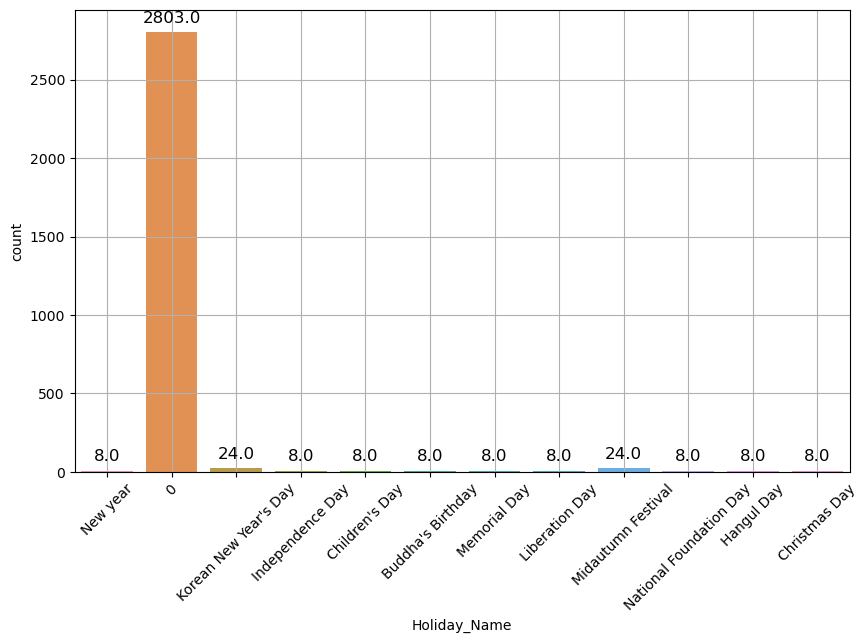

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Holiday_Name', data=project)
plt.grid()
plt.xticks(rotation=45)

# 각 막대 위에 count 값을 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [83]:
file_path = 'data2.pkl'
joblib.dump(project, file_path)

# 저장한 데이터프레임 확인
print("project데이터 data2.pkl로 저장 완료!")

project데이터 data2.pkl로 저장 완료!
